In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import scipy.io as sio

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.age(1)

import seaborn as sns
import pandas as pd
from astropy.io import fits

sns.set(font_scale=2)
sns.set_style("whitegrid")

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Step 1: import catalogs and galaxy IDs [and flags]

In [2]:
# SEDs in magnitudes
candels_cat_small = np.loadtxt('catalogs/CANDELS_GDSS_workshop.dat')

# subtracting 1 from the ID for python indexing
cat_small_ids = candels_cat_small[0:,0] - 1
cat_small_z = candels_cat_small[0:,1]

print(str(cat_small_z.shape[0])+' galaxies in the small catalog.')

#------------------------------------------------------------------------------

candels_cat_z1 = np.loadtxt('catalogs/CANDELS_GDSS_workshop_z1.dat')

# subtracting 1 from the ID for python indexing
cat_z1_ids = candels_cat_z1[0:,0] - 1
cat_z1_z = candels_cat_z1[0:,1]
print(str(cat_z1_z.shape[0])+' galaxies in the z~1 catalog.')

#------------------------------------------------------------------------------

candels_cat_z3 = np.loadtxt('catalogs/CANDELS_GDSS_workshop_z3.dat')

# subtracting 1 from the ID for python indexing
cat_z3_ids = candels_cat_z3[0:,0] - 1
cat_z3_z = candels_cat_z3[0:,1]

print(str(cat_z3_z.shape[0])+' galaxies in the z~3 catalog.')

z1flag_cat = np.genfromtxt('catalogs/flags_z1.dat')
z1flag_ids = z1flag_cat[0:,0]

z1_mask = np.zeros_like(cat_z1_ids)
for i in range(len(z1flag_ids)):
    z1_mask[cat_z1_ids == z1flag_ids[i]-1 ] = 1
    
z3flag_cat = np.genfromtxt('catalogs/flags_z3.dat')
z3flag_ids = z3flag_cat[0:,0]

z3_mask = np.zeros_like(cat_z3_ids)
for i in range(len(z3flag_ids)):
    z3_mask[cat_z3_ids == z3flag_ids[i]-1 ] = 1

23 galaxies in the small catalog.
371 galaxies in the z~1 catalog.
161 galaxies in the z~3 catalog.


# Step 2: import outputs of all the SED fitting codes.

In [3]:
%run import_scripts/import_p16_fits.py
%run import_scripts/import_dense_basis_fits.py
%run import_scripts/import_fitsed_fits.py
%run import_scripts/import_nima_lephare_fits.py
%run import_scripts/import_marianna_zphot_fits.py
%run import_scripts/import_prospector_fits.py
%run import_scripts/import_bagpipes_fits.py
%run import_scripts/import_cigale_fits.py
%run import_scripts/import_interrogator_fits.py
%run import_scripts/import_speedyMC_fits.py
%run import_scripts/import_eazy_fits.py
%run import_scripts/import_magphys_fits.py
%run import_scripts/import_beagle_fits.py
%run import_scripts/import_sed3fit_fits.py

imported pacifici+16 fits.
imported dense basis fits.
imported FITSED (salmon+15?) fits.
imported Nima's LePhare fits.
imported Marianna's (zPhot) fits.
imported Prospector fits.
imported bagpipes fits.
imported cigale fits.
imported interrogator fits.
imported SpeedyMC fits.
imported eazy fits.
imported magphys fits.
imported beagle fits.
imported SED3fit fits.


# Step 3: Take everyone's data and put it in a dataframe, then start the visualization and analysis.

## define dataframes below for Mass, SFR and dust at z~1. Change the dictionary labels here to change the x-tick labels in the violin- and box-plots.

In [4]:
brett_mass_z1_masked = brett_mass_z1
brett_mass_z1_masked[brett_mass_z1_masked < 0] = np.nan

nima_mass_z1_masked = nima_mass_z1
nima_mass_z1_masked[nima_mass_z1_masked < 0] = np.nan

# 'MAGPHYS [no AGN]':magphys_mass_z1, 
# 'MAGPHYS [w/AGN]':magphys_mass_z1_wagn, 
# 'Cigale [w/AGN]':cigale_ir_agn_mass, 
# 'Cigale [no AGN]':cigale_mass, 

# Missing codes: BEAGLE, any others ???

z1_cat_mass_dict = {'zPhot':marianna_mass_z1, 
                    'LePhare':nima_mass_z1_masked, 
                    'FITSED':brett_mass_z1_masked, 
                    'MAGPHYS':magphys_mass_z1, 
                    'EAZY':eazy_mass_z1, 
                    'SpeedyMC':speedy_mass_z1,
                    'Cigale':cigale_mass, 
                    'Dense Basis': DB_mass_z1.ravel(), 
                    'Pacifici+16': cami_mass_z1.ravel(), 
                    'Prospector': prospector_mass_z1.ravel(),
                    'Beagle': beagle_mass_z1,
                    'Bagpipes': bagpipes_mass_z1, 
                    'SED3FIT':sed3fit_mass_z1,
                    'Interrogator [BPASS]':interrogator_mass_z1_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_mass_z1_pegase.ravel()}
z1_cat_mass = pd.DataFrame(data=z1_cat_mass_dict)

z1_cat_mass[z1_cat_mass < 7] = np.nan

#-----------------------------------------------------------------------
# getting mass uncertainties as well


nima_mass_uncert_z1_masked = nima_mass_hi_z1 - nima_mass_lo_z1
nima_mass_uncert_z1_masked[nima_mass_z1 < 0] = np.nan

brett_mass_uncert_z1_masked = brett_mass_hi_z1 - brett_mass_lo_z1
brett_mass_uncert_z1_masked[brett_mass_z1 < 0] = np.nan
#brett_mass_uncert_z1_masked[brett_mass_uncert_z1_masked > 1] = np.nan

# 'Cigale [w/AGN]':(cigale_mass_hi_z1_wagn.ravel() - cigale_mass_lo_z1_wagn.ravel()), 
# 'Cigale [no AGN]':(cigale_mass_hi_z1_noagn.ravel() - cigale_mass_lo_z1_noagn.ravel()), 
# 'MAGPHYS [no AGN]':magphys_mass_hi_z1 - magphys_mass_lo_z1, 
# 'MAGPHYS [w/AGN]':magphys_mass_hi_z1_wagn - magphys_mass_lo_z1_wagn, 

z1_cat_mass_uncert_dict = {'zPhot':marianna_mass_hi_z1 - marianna_mass_lo_z1, 
                    'LePhare':nima_mass_uncert_z1_masked, 
                    'FITSED':brett_mass_uncert_z1_masked, 
                    'MAGPHYS':magphys_mass_hi_z1 - magphys_mass_lo_z1, 
                    'EAZY':np.ones_like(eazy_mass_z1)*0.2, 
                    'SpeedyMC':speedy_mass_hi_z1 - speedy_mass_lo_z1,
                    'Cigale':(cigale_mass_hi_z1_noagn.ravel() - cigale_mass_lo_z1_noagn.ravel()), 
                    'Dense Basis': DB_mass_hi_z1 - DB_mass_lo_z1, 
                    'Pacifici+16': cami_mass_hi_z1 - cami_mass_lo_z1, 
                    'Prospector': (prospector_mass_hi_z1.ravel() - prospector_mass_lo_z1.ravel()),
                    'Bagpipes': bagpipes_mass_hi_z1 - bagpipes_mass_lo_z1, 
                    'Beagle': beagle_mass_hi_z1 - beagle_mass_lo_z1,
                    'SED3FIT':sed3fit_mass_z1_high - sed3fit_mass_z1_low,
                    'Interrogator [BPASS]':(interrogator_mass_z1_hi_bpass.ravel() - interrogator_mass_z1_lo_bpass.ravel()), 
                    'Interrogator [Pegase]':(interrogator_mass_z1_hi_pegase.ravel() - interrogator_mass_z1_lo_pegase.ravel())}
z1_cat_mass_uncert = pd.DataFrame(data=z1_cat_mass_uncert_dict)

z1_cat_mass_uncert[z1_cat_mass < 7] = np.nan
z1_cat_mass_uncert[z1_cat_mass_uncert > 2] = np.nan



#-----------------------------------------------------------------------


# 'MAGPHYS [no AGN]':magphys_sfr_z1, 
# 'MAGPHYS [w/AGN]':magphys_sfr_z1_wagn, 
# 'Cigale [w/AGN]':cigale_ir_agn_sfr, 
# 'Cigale [no AGN]':cigale_sfr, 

z1_cat_sfr_dict = {'zPhot':marianna_sfr_z1, 
                    'LePhare':nima_sfr_z1, 
                    'FITSED':brett_sfr_z1, 
                    'MAGPHYS':magphys_sfr_z1, 
                    'EAZY':eazy_sfr_z1, 
                    'SpeedyMC':speedy_sfr_z1,
                    'Cigale':cigale_sfr, 
                    'Dense Basis': DB_sfr_z1.ravel(), 
                    'Pacifici+16': cami_sfr_z1.ravel(), 
                    'Prospector': prospector_sfr_z1.ravel(),
                    'Bagpipes': bagpipes_sfr_z1, 
                    'Beagle': beagle_sfr_z1,
                    'SED3FIT':sed3fit_sfr_z1,
                    'Interrogator [BPASS]':interrogator_sfr_z1_bpass, 
                    'Interrogator [Pegase]':interrogator_sfr_z1_pegase}
z1_cat_sfr = pd.DataFrame(data=z1_cat_sfr_dict)

z1_cat_sfr[z1_cat_sfr < -3] = -3 # fixes the stretching that a lot of the SFR distributions show due to exrtemely low SFRs


#-----------------------------------------------------------------------
# getting sfr uncertainties as well


nima_sfr_uncert_z1_masked = nima_sfr_hi_z1 - nima_sfr_lo_z1
nima_sfr_uncert_z1_masked[nima_sfr_z1 < 0] = np.nan

brett_sfr_uncert_z1_masked = brett_sfr_hi_z1 - brett_sfr_lo_z1
brett_sfr_uncert_z1_masked[brett_sfr_z1 < 0] = np.nan
#brett_sfr_uncert_z1_masked[brett_sfr_uncert_z1_masked > 1] = np.nan

# 'MAGPHYS [no AGN]':magphys_sfr_hi_z1 - magphys_sfr_lo_z1, 
# 'MAGPHYS [w/AGN]':magphys_sfr_hi_z1_wagn - magphys_sfr_lo_z1_wagn, 
# 'Cigale [w/AGN]':(cigale_sfr_hi_z1_wagn.ravel() - cigale_sfr_lo_z1_wagn.ravel()), 
# 'Cigale [no AGN]':(cigale_sfr_hi_z1_noagn.ravel() - cigale_sfr_lo_z1_noagn.ravel()), 

z1_cat_sfr_uncert_dict = {'zPhot':marianna_sfr_hi_z1 - marianna_sfr_lo_z1, 
                    'LePhare':nima_sfr_uncert_z1_masked, 
                    'FITSED':brett_sfr_uncert_z1_masked, 
                    'MAGPHYS':magphys_sfr_hi_z1 - magphys_sfr_lo_z1, 
                    'EAZY':np.ones_like(eazy_sfr_z1)*0.2, 
                    'SpeedyMC':speedy_sfr_hi_z1 - speedy_sfr_lo_z1,
                    'Cigale':(cigale_sfr_hi_z1_noagn.ravel() - cigale_sfr_lo_z1_noagn.ravel()), 
                    'Dense Basis': DB_sfr_hi_z1 - DB_sfr_lo_z1, 
                    'Pacifici+16': cami_sfr_hi_z1 - cami_sfr_lo_z1, 
                    'Prospector': (prospector_sfr_hi_z1.ravel() - prospector_sfr_lo_z1.ravel()),
                    'Bagpipes': bagpipes_sfr_hi_z1 - bagpipes_sfr_lo_z1, 
                    'Beagle': beagle_sfr_hi_z1 - beagle_sfr_lo_z1,
                    'SED3FIT':sed3fit_sfr_z1_high - sed3fit_sfr_z1_low,
                    'Interrogator [BPASS]':(interrogator_sfr_z1_hi_bpass.ravel() - interrogator_sfr_z1_lo_bpass.ravel()), 
                    'Interrogator [Pegase]':(interrogator_sfr_z1_hi_pegase.ravel() - interrogator_sfr_z1_lo_pegase.ravel())}
z1_cat_sfr_uncert = pd.DataFrame(data=z1_cat_sfr_uncert_dict)

z1_cat_sfr_uncert[z1_cat_mass < 7] = np.nan
z1_cat_sfr_uncert[z1_cat_sfr_uncert > 2] = np.nan
z1_cat_sfr_uncert = np.abs(z1_cat_sfr_uncert)


#-----------------------------------------------------------------------


interrogator_Av_z1_bpass[interrogator_Av_z1_bpass < 0] = np.nan
interrogator_Av_z1_pegase[interrogator_Av_z1_pegase < 0] = np.nan

# 'MAGPHYS [no AGN]':magphys_Av_z1, 
# 'MAGPHYS [w/AGN]':magphys_Av_z1_wagn, 
# 'Cigale [w/AGN]':cigale_ir_agn_Av, 
# 'Cigale [no AGN]':cigale_Av, 

z1_cat_Av_dict = {'zPhot':marianna_Av_z1, 
                    'LePhare':nima_Av_z1, 
                    'FITSED':brett_Av_z1, 
                    'MAGPHYS':magphys_Av_z1, 
                    'EAZY':eazy_Av_z1, 
                    'SpeedyMC':speedy_Av_z1,
                    'Cigale':cigale_Av, 
                    'Dense Basis': DB_Av_z1.ravel(), 
                    'Pacifici+16': cami_Av_z1.ravel(), 
                    'Prospector': prospector_Av_z1.ravel(),
                    'Bagpipes': bagpipes_Av_z1, 
                    'Beagle': beagle_Av_z1,
                    'SED3FIT':sed3fit_av_z1,
                    'Interrogator [BPASS]':interrogator_Av_z1_bpass, 
                    'Interrogator [Pegase]':interrogator_Av_z1_pegase}
z1_cat_Av = pd.DataFrame(data=z1_cat_Av_dict)



#-----------------------------------------------------------------------


interrogator_Av_z1_bpass[interrogator_Av_z1_bpass < 0] = np.nan
interrogator_Av_z1_pegase[interrogator_Av_z1_pegase < 0] = np.nan

# 'MAGPHYS [no AGN]':magphys_Av_z1, 
# 'MAGPHYS [w/AGN]':magphys_Av_z1_wagn, 
# 'Cigale [w/AGN]':cigale_ir_agn_Av, 
# 'Cigale [no AGN]':cigale_Av, 

z1_cat_Av_uncert_dict = {'zPhot':np.ones_like(marianna_Av_z1)*np.nan, 
                    'LePhare':np.ones_like(nima_Av_z1)*np.nan, 
                    'FITSED':(brett_Av_hi_z1 - brett_Av_lo_z1), 
                    'MAGPHYS':(magphys_Av_hi_z1 - magphys_Av_lo_z1), 
                    'EAZY':np.ones_like(eazy_Av_z1)*np.nan, 
                    'SpeedyMC':(speedy_Av_hi_z1 - speedy_Av_lo_z1),
                    'Cigale':cigale_Av_err*2, 
                    'Dense Basis': (DB_Av_hi_z1.ravel() - DB_Av_lo_z1.ravel()), 
                    'Pacifici+16': (cami_Av_hi_z1.ravel() - cami_Av_hi_z1.ravel()), 
                    'Prospector': (prospector_Av_hi_z1.ravel() - prospector_Av_lo_z1.ravel()),
                    'Bagpipes': (bagpipes_Av_hi_z1 - bagpipes_Av_lo_z1), 
                    'Beagle': (beagle_Av_hi_z1 - beagle_Av_lo_z1),
                    'SED3FIT':(sed3fit_av_z1_high - sed3fit_av_z1_low),
                    'Interrogator [BPASS]':(interrogator_Av_z1_hi_bpass - interrogator_Av_z1_lo_bpass), 
                    'Interrogator [Pegase]':(interrogator_Av_z1_hi_pegase - interrogator_Av_z1_lo_pegase)}
z1_cat_Av_uncert = pd.DataFrame(data=z1_cat_Av_uncert_dict)



print(z1_cat_mass.shape)
print(z1_cat_sfr.shape)
print(z1_cat_Av.shape)

(371, 15)
(371, 15)
(371, 15)


In [5]:
z1_cat_mass_lo_dict = {'zPhot':marianna_mass_lo_z1, 
                    'LePhare':nima_mass_lo_z1, 
                    'FITSED':brett_mass_lo_z1, 
                    'MAGPHYS':magphys_mass_lo_z1, 
                    'EAZY':eazy_mass_z1-0.1, 
                    'SpeedyMC':speedy_mass_lo_z1,
                    'Cigale':cigale_mass_lo_z1_noagn, 
                    'Dense Basis': DB_mass_lo_z1.ravel(), 
                    'Pacifici+16': cami_mass_lo_z1.ravel(), 
                    'Prospector': prospector_mass_lo_z1.ravel(),
                    'Beagle': beagle_mass_lo_z1,
                    'Bagpipes': bagpipes_mass_lo_z1, 
                    'SED3FIT':sed3fit_mass_z1_low,
                    'Interrogator [BPASS]':interrogator_mass_z1_lo_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_mass_z1_lo_pegase.ravel()}
z1_cat_mass_lo = pd.DataFrame(data=z1_cat_mass_lo_dict)

z1_cat_mass_hi_dict = {'zPhot':marianna_mass_hi_z1, 
                    'LePhare':nima_mass_hi_z1, 
                    'FITSED':brett_mass_hi_z1, 
                    'MAGPHYS':magphys_mass_hi_z1, 
                    'EAZY':eazy_mass_z1-0.1, 
                    'SpeedyMC':speedy_mass_hi_z1,
                    'Cigale':cigale_mass_hi_z1_noagn, 
                    'Dense Basis': DB_mass_hi_z1.ravel(), 
                    'Pacifici+16': cami_mass_hi_z1.ravel(), 
                    'Prospector': prospector_mass_hi_z1.ravel(),
                    'Beagle': beagle_mass_hi_z1,
                    'Bagpipes': bagpipes_mass_hi_z1, 
                    'SED3FIT':sed3fit_mass_z1_high,
                    'Interrogator [BPASS]':interrogator_mass_z1_hi_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_mass_z1_hi_pegase.ravel()}
z1_cat_mass_hi = pd.DataFrame(data=z1_cat_mass_hi_dict)

z1_cat_sfr_lo_dict = {'zPhot':marianna_sfr_lo_z1, 
                    'LePhare':nima_sfr_lo_z1, 
                    'FITSED':brett_sfr_lo_z1, 
                    'MAGPHYS':magphys_sfr_lo_z1, 
                    'EAZY':eazy_sfr_z1-0.1, 
                    'SpeedyMC':speedy_sfr_lo_z1,
                    'Cigale':cigale_sfr_lo_z1_noagn, 
                    'Dense Basis': DB_sfr_lo_z1.ravel(), 
                    'Pacifici+16': cami_sfr_lo_z1.ravel(), 
                    'Prospector': prospector_sfr_lo_z1.ravel(),
                    'Beagle': beagle_sfr_lo_z1,
                    'Bagpipes': bagpipes_sfr_lo_z1, 
                    'SED3FIT':sed3fit_sfr_z1_low,
                    'Interrogator [BPASS]':interrogator_sfr_z1_lo_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_sfr_z1_lo_pegase.ravel()}
z1_cat_sfr_lo = pd.DataFrame(data=z1_cat_sfr_lo_dict)

z1_cat_sfr_hi_dict = {'zPhot':marianna_sfr_hi_z1, 
                    'LePhare':nima_sfr_hi_z1, 
                    'FITSED':brett_sfr_hi_z1, 
                    'MAGPHYS':magphys_sfr_hi_z1, 
                    'EAZY':eazy_sfr_z1-0.1, 
                    'SpeedyMC':speedy_sfr_hi_z1,
                    'Cigale':cigale_sfr_hi_z1_noagn, 
                    'Dense Basis': DB_sfr_hi_z1.ravel(), 
                    'Pacifici+16': cami_sfr_hi_z1.ravel(), 
                    'Prospector': prospector_sfr_hi_z1.ravel(),
                    'Beagle': beagle_sfr_hi_z1,
                    'Bagpipes': bagpipes_sfr_hi_z1, 
                    'SED3FIT':sed3fit_sfr_z1_high,
                    'Interrogator [BPASS]':interrogator_sfr_z1_hi_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_sfr_z1_hi_pegase.ravel()}
z1_cat_sfr_hi = pd.DataFrame(data=z1_cat_sfr_hi_dict)

z1_cat_Av_lo_dict = {'zPhot':marianna_Av_z1 - 0.1, 
                    'LePhare':nima_Av_z1 - 0.1, 
                    'FITSED':brett_Av_lo_z1, 
                    'MAGPHYS':magphys_Av_lo_z1, 
                    'EAZY':eazy_Av_z1-0.1, 
                    'SpeedyMC':speedy_Av_lo_z1,
                    'Cigale':cigale_Av - cigale_Av_err, 
                    'Dense Basis': DB_Av_lo_z1.ravel(), 
                    'Pacifici+16': cami_Av_lo_z1.ravel(), 
                    'Prospector': prospector_Av_lo_z1.ravel(),
                    'Beagle': beagle_Av_lo_z1,
                    'Bagpipes': bagpipes_Av_lo_z1, 
                    'SED3FIT':sed3fit_av_z1 - 0.1,
                    'Interrogator [BPASS]':interrogator_Av_z1_lo_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_Av_z1_lo_pegase.ravel()}
z1_cat_Av_lo = pd.DataFrame(data=z1_cat_Av_lo_dict)

z1_cat_Av_hi_dict = {'zPhot':marianna_Av_z1 + 0.1, 
                    'LePhare':nima_Av_z1 + 0.1, 
                    'FITSED':brett_Av_hi_z1, 
                    'MAGPHYS':magphys_Av_hi_z1, 
                    'EAZY':eazy_Av_z1-0.1, 
                    'SpeedyMC':speedy_Av_hi_z1,
                    'Cigale':cigale_Av + cigale_Av_err, 
                    'Dense Basis': DB_Av_hi_z1.ravel(), 
                    'Pacifici+16': cami_Av_hi_z1.ravel(), 
                    'Prospector': prospector_Av_hi_z1.ravel(),
                    'Beagle': beagle_Av_hi_z1,
                    'Bagpipes': bagpipes_Av_hi_z1, 
                    'SED3FIT':sed3fit_av_z1 + 0.1,
                    'Interrogator [BPASS]':interrogator_Av_z1_hi_bpass.ravel(), 
                    'Interrogator [Pegase]':interrogator_Av_z1_hi_pegase.ravel()}
z1_cat_Av_hi = pd.DataFrame(data=z1_cat_Av_hi_dict)

# make (and save) plots: 

# quantifying variance in parameter estimates due to different modeling assumptions

In [6]:
mass_z1cat_50 = np.nanmedian(z1_cat_mass,axis=1)
mass_z1cat_16 = np.nanpercentile(z1_cat_mass,16,axis=1)
mass_z1cat_84 = np.nanpercentile(z1_cat_mass,84,axis=1)

z1_cat_sfr[z1_cat_sfr < -3] = np.nan

sfr_z1cat_50 = np.nanmedian(z1_cat_sfr,axis=1)
sfr_z1cat_16 = np.nanpercentile(z1_cat_sfr,16,axis=1)
sfr_z1cat_84 = np.nanpercentile(z1_cat_sfr,84,axis=1)

ssfr_dist = np.log10(10**np.array(z1_cat_sfr) / 10**np.array(z1_cat_mass))

ssfr_z1cat_50 = np.nanmedian(ssfr_dist,axis=1)
ssfr_z1cat_16 = np.nanpercentile(ssfr_dist,16,axis=1)
ssfr_z1cat_84 = np.nanpercentile(ssfr_dist,84,axis=1)

Av_z1cat_50 = np.nanmedian(z1_cat_Av,axis=1)
Av_z1cat_16 = np.nanpercentile(z1_cat_Av,16,axis=1)
Av_z1cat_84 = np.nanpercentile(z1_cat_Av,84,axis=1)

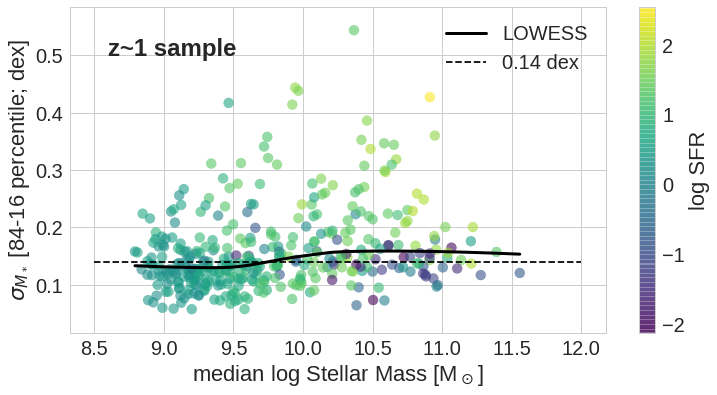

In [7]:
# plot variability for all the galaxies:

sns.set_style("whitegrid")


plt.figure(figsize=(12,6))
plt.scatter(mass_z1cat_50, (mass_z1cat_84 - mass_z1cat_16)/2,s=100,alpha=0.6,c=sfr_z1cat_50,cmap='viridis')

z1 = lowess((mass_z1cat_84 - mass_z1cat_16)/2,mass_z1cat_50)
plt.plot(z1[0:,0],z1[0:,1],'k-',lw=3,label='LOWESS')
median_val = np.nanmedian((mass_z1cat_84 - mass_z1cat_16)/2)
plt.plot([8.5,12],[median_val,median_val],'k--',label='%.2f dex' %median_val)
plt.xlabel(r'median log Stellar Mass [M$_\odot$]')
plt.ylabel(r'$\sigma_{M_*}$ [84-16 percentile; dex]')
plt.legend()
plt.text(8.6,0.5,'z~1 sample',fontsize=24,fontweight='bold')

clbr = plt.colorbar()
clbr.set_label('log SFR')
fname = 'figures/mass_variability_z1.png'
plt.savefig(fname, bbox_inches='tight')

plt.show()

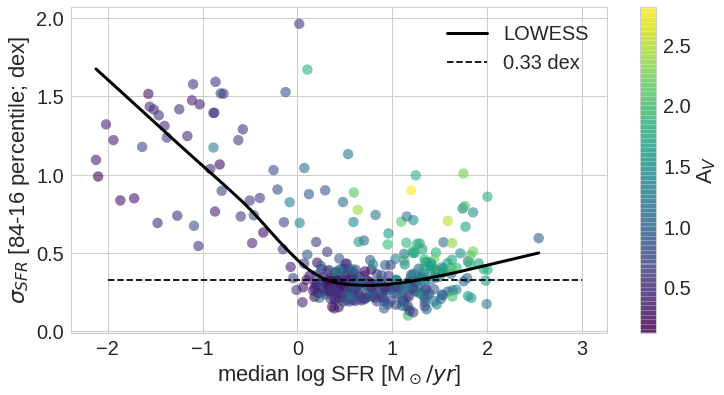

In [8]:
# plot variability for all the galaxies:

sns.set_style("whitegrid")


plt.figure(figsize=(12,6))
plt.scatter(sfr_z1cat_50, (sfr_z1cat_84 - sfr_z1cat_16)/2,s=100,alpha=0.6,c=Av_z1cat_50,cmap='viridis')

z1 = lowess((sfr_z1cat_84 - sfr_z1cat_16)/2,sfr_z1cat_50)
plt.plot(z1[0:,0],z1[0:,1],'k-',lw=3,label='LOWESS')
median_val = np.nanmedian((sfr_z1cat_84 - sfr_z1cat_16)/2)
plt.plot([-2,3],[median_val,median_val],'k--',label='%.2f dex' %median_val)
plt.xlabel(r'median log SFR [M$_\odot/yr$]')
plt.ylabel(r'$\sigma_{SFR}$ [84-16 percentile; dex]')
plt.legend()
#plt.text(8.6,0.5,'z~1 sample',fontsize=24,fontweight='bold')

clbr = plt.colorbar()
clbr.set_label(r'A$_V$')
fname = 'figures/sfr_variability_z1.png'
plt.savefig(fname, bbox_inches='tight')

plt.show()

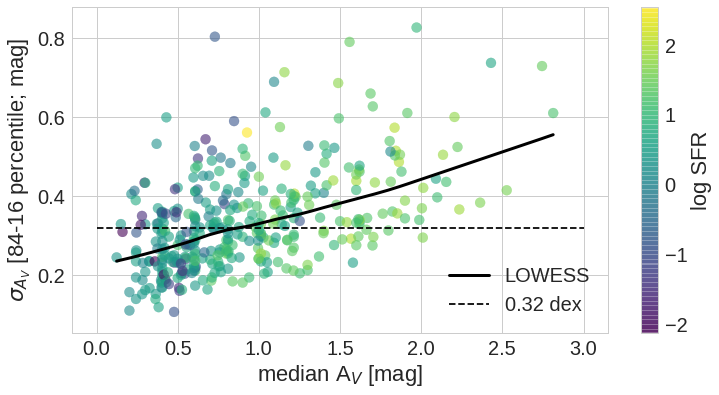

In [9]:
# plot variability for all the galaxies:

sns.set_style("whitegrid")


plt.figure(figsize=(12,6))
plt.scatter(Av_z1cat_50, (Av_z1cat_84 - Av_z1cat_16)/2,s=100,alpha=0.6,c=sfr_z1cat_50,cmap='viridis')

z1 = lowess((Av_z1cat_84 - Av_z1cat_16)/2,Av_z1cat_50)
plt.plot(z1[0:,0],z1[0:,1],'k-',lw=3,label='LOWESS')
median_val = np.nanmedian((Av_z1cat_84 - Av_z1cat_16)/2)
plt.plot([0,3],[median_val,median_val],'k--',label='%.2f dex' %median_val)
plt.xlabel(r'median A$_V$ [mag]')
plt.ylabel(r'$\sigma_{A_V}$ [84-16 percentile; mag]')
plt.legend()
#plt.text(8.6,0.5,'z~1 sample',fontsize=24,fontweight='bold')

clbr = plt.colorbar()
clbr.set_label(r'log SFR')
fname = 'figures/Av_variability_z1.png'
plt.savefig(fname, bbox_inches='tight')

plt.show()